## e e*---->Z----->mu mu*

In [24]:
#importing interesting libraries

import uproot
import matplotlib.pyplot as plt
import vector
import time
import awkward as ak
import infofile
import numpy as np


## Reading the Data

In [25]:
MeV = 0.001
GeV = 1

In [26]:
#defining path for the data
path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/"

Making a dictionary so that we can make list of the necessary files and colors for the plot

In [28]:
sample = {
    'data':{
        'list' : ['data_A','data_B','data_C','data_D'] #the Data of detector
    },

    r'Signal ($m_Z$ = 90 GeV)':{
        'list': ['Zmumu'],
        'color': "#00cdff"
    },

    'Background' :{
        'list':['Ztautau','Zee']
    }
    
}

In [29]:
value = sample['data']['list'][0]

data_path = path+'Data/'+value+'.2lep.root'

In [30]:
#opening the file
tree = uproot.open(data_path+":mini")

In [31]:
print(tree.keys())

['runNumber', 'eventNumber', 'channelNumber', 'mcWeight', 'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON', 'scaleFactor_PHOTON', 'scaleFactor_TAU', 'scaleFactor_BTAG', 'scaleFactor_LepTRIGGER', 'scaleFactor_PhotonTRIGGER', 'trigE', 'trigM', 'trigP', 'lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt', 'jet_trueflav', 'jet_truthMatched', 'jet_MV2c10', 'photon_n', 'photon_truthMatched', 'photon_trigMatched', 'photon_pt', 'photon_eta', 'photon_phi', 'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20', 'photon_convType', 'tau_n', 'tau_pt', 'tau_eta', 'tau_phi', 'tau_E', 'tau_isTightID', 'tau_truthMatched', 'tau_trigMatched', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst', 'met_et_syst', 'jet_pt_syst', 'p

In [32]:
tree['lep_type'].arrays(library='ak')

<Array [{lep_type: [11, 11]}, ..., {...}] type='668152 * {lep_type: var * u...'>

In [33]:
def cut_lep_type(lep_type):
    sum_lep_type = lep_type[:,0]+lep_type[:,1] !=26
    return sum_lep_type
def calc_mass(lep_pt,lep_eta,lep_phi,lep_E):
    p4 = vector.zip({'pt':lep_pt,'eta':lep_eta,'phi':lep_phi,'E':lep_E})
    invariant_mass = (p4[:, 0] + p4[:, 1] ).M * MeV
    return invariant_mass

Making list of variables that are neccessary for us to calculate the invariant mass.

In [34]:
variable = ['lep_pt','lep_eta','lep_phi','lep_E','lep_type']

In [35]:
tree['lep_eta']

<TBranchElement 'lep_eta' at 0x7c57a56fa090>

In [36]:
sample_data=[]
for data in tree.iterate(variable,library='ak',step_size=1000000):
    lep_type = data['lep_type']
    data  = data[~cut_lep_type(lep_type)]

    data['mass'] = calc_mass(data['lep_pt'], data['lep_eta'], data['lep_phi'], data['lep_E'])

    sample_data.append(data)

data_A = ak.concatenate(sample_data)

Now the plotting begins

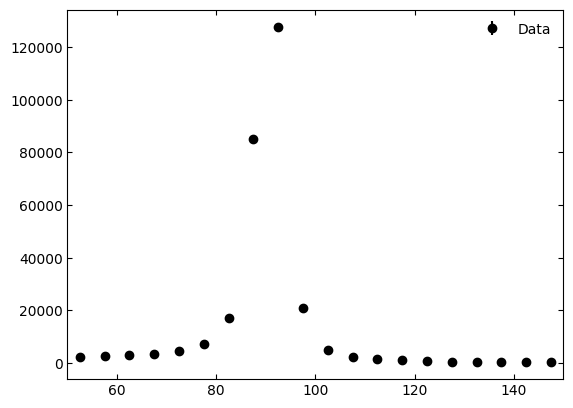

In [39]:
xmin = 50*GeV
xmax = 150 *GeV

#Histogram Data setup step_size,bin_edges,bin_centers
step_size = 5*GeV
bin_edges = np.arange(start=xmin , stop=xmax+step_size,step=step_size)
bin_centers = np.arange(start=xmin+step_size/2 ,stop = xmax+step_size/2,step=step_size)


data_x,_ = np.histogram(ak.to_numpy(data['mass']),bins=bin_edges)
data_x_errors = np.sqrt(data_x)
#errorbar

main_axes = plt.gca()

main_axes.errorbar(x=bin_centers,y=data_x,yerr=data_x_errors,
                  fmt='ko',label='Data')


##beautifying
main_axes.set_xlim(left=xmin,right=xmax)

main_axes.tick_params(which= 'both',direction='in',top=True,right=True)

main_axes.legend(frameon=False)





## Monte Carlo Data 

We will here now work on getting the monte carlo data.